In [ ]:
# Notebook adapted from Jeremy P. Howard

In [ ]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


In [ ]:
def linear_function(alpha,beta,x): return alpha+beta*x
rc('animation',html='html5')
rcParams['figure.figsize'] = 3, 3

beta_true = 6.0
alpha_true = 3.0
n = 30
x = random(n)
y = linear_function(alpha_true,beta_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.01

<p>Square error is square of difference between predicted and actual data values</p>
Define predicted: ${\hat y} $ and actual:${y}$ 
<p>Loss is:</p>
$({\hat y}-{y})^2$
<p>Previous definition y as linear_function</p>
${\hat y=\alpha + \beta x}$
<p>To minmize the Loss we take the derivative of the loss wrt alpha and beta, not x. x and y are datapoints
which is our dataset we are trying to fit to. The derivative of y is the sum of the partial derivatives of the dependent variables
which in this case are alpha and beta. </p>
<p></p>
$derivative(loss)=\cfrac{\partial(loss)}{\partial \alpha} + \cfrac{\partial(loss)}{\partial \beta}$
<p></p>
$\cfrac{\partial(loss)}{\partial \alpha}=\cfrac{(\hat y - y)^2}{\partial \alpha}=\cfrac{2*(\hat y-y)*\partial(\hat y - y)}{\partial \alpha}$
<p>Using:</p>
$\cfrac{\partial \hat y}{\partial \alpha}=1$ 
<p>and</p>
$\cfrac{\partial y}{\partial \alpha}=0$
<p>the derivative of loss wrt alpha for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \alpha}=2(\hat y-y)$
<p>The derivative of loss WRT beta starts as:</p>  
$\cfrac{\partial(loss)}{\partial \beta}=\cfrac{(\hat y - y)^2}{\partial \beta}=\cfrac{2*(\hat y-y)}{\partial \beta}*\cfrac{\partial(\hat y -y)}{\partial \beta}$
<p></p>
$\cfrac{\partial \hat y}{\partial \beta}=x$ and
$\cfrac{\partial y}{\partial \beta}=0$
<p>the derivative of loss wrt beta for y-hat is:</p>
$\cfrac{\partial (loss)}{\partial \beta}=2x*(\hat y-y)$


In [ ]:
def update_alpha_and_beta():
    global alpha, beta
    y_predicted = linear_function(alpha,beta,x)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(20): 
        update_alpha_and_beta()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
# Comment out (or delete) the following command, which shows the animation in Jupyter Notebook, 
# if you want the mp4 saved to disk to be correctly animated. 
# (Alternatively, you can reset the values of alpha and beta to their initial values 
# after this command.)

resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('linear_animation.mp4', writer=writer)

In [ ]:
print('Done linear animation')

$y=\gamma x^2 + \beta x + \alpha$
<p></p>
$\cfrac{\partial(loss)}{\partial \gamma}=2x^2(\hat y-y)$
$\cfrac{\partial(loss)}{\partial \beta}=2x(\hat y -y)$
$\cfrac{\partial(loss)}{\partial \alpha}=2(\hat y-y)$


In [ ]:
def square_function(gamma, beta, alpha,x):
    return gamma*x**2 + beta*x + alpha

In [ ]:
#It doesnt make sense to use a quadratic to approximate a linear function,so change the dataset to 
#be quadratic

beta_true = 2.0
alpha_true = 2.0
gamma_true = 10.0

n = 300
x = random(n)
y = square_function(gamma_true,beta_true,alpha_true,x)+0.2*randn(n)
beta = -1.
alpha = 3.
gamma = 2.
learning_rate = 0.01

In [ ]:
def update_squared():
    global gamma, alpha, beta
    y_predicted = square_function(gamma,beta,alpha,x)
    derivative_of_loss_wrt_gamma = 2*x**2*(y_predicted-y)
    derivative_of_loss_wrt_alpha = 2*(y_predicted-y)
    derivative_of_loss_wrt_beta = x* derivative_of_loss_wrt_alpha
    alpha = alpha - learning_rate*derivative_of_loss_wrt_alpha.mean()
    beta = beta - learning_rate*derivative_of_loss_wrt_beta.mean()
    gamma = gamma - learning_rate * derivative_of_loss_wrt_gamma.mean()

def animate(i):
    x = np.linspace(0,1,100)
    y = square_function(gamma,beta,alpha,x)
    line.set_data(x,y)
    for i in range(20): 
        update_squared()
    return (line,)

In [ ]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x,y)
line, = ax.plot([],[],lw=2)

In [ ]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,250),interval=100)

In [ ]:
%matplotlib inline
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('squared_animation.mp4', writer=writer)

In [ ]:
print('Done squared animation')

<h6>SGD</h6>

In [1]:
import numpy as np
from numpy.random import random, randn
from matplotlib import pyplot as plt, animation, rcParams, rc


def linear_function(alpha,beta,x): return alpha+beta*x
beta_true = 6.0
alpha_true = 3.0
n = 30
x_data= random(n)
y_data = linear_function(alpha_true,beta_true,x_data)+0.2*randn(n)
beta = -1.
alpha = 3.
learning_rate = 0.1
num_iters=100

In [2]:
#SGD requires a batch size of 1 
def update_alpha_and_beta(x_batch,y_batch):
    global alpha, beta
    y_predicted_batch = linear_function(alpha,beta,x_batch)
    derivative_of_loss_wrt_alpha = 2*(y_predicted_batch-y_batch)
    derivative_of_loss_wrt_beta = x_batch* derivative_of_loss_wrt_alpha
    #print("before ","alpha:",alpha,"beta:",beta)

    for i in range(num_iters):
        #print("y_predicted_batch:",y_predicted_batch)
        #print("x_batch:",x_batch,"y_batch:",y_batch)
        #print("learning_rate:",learning_rate)
        #print("2*learning_rate*(y_predicted_batch-y_batch)",2*learning_rate*(y_predicted_batch-y_batch))
        #print("2*x_batch*(y_predicted_batch-y_batch)",2*x_batch*(y_predicted_batch-y_batch))
        alpha = alpha - 2*learning_rate*(y_predicted_batch-y_batch)
        beta = beta - learning_rate*2*x_batch*(y_predicted_batch-y_batch)
        y_predicted_batch = linear_function(alpha,beta,x_batch)
        
    #print("after ","alpha:",alpha,"beta:",beta)
def animate(i):
    x = np.linspace(0,1,100)
    y = linear_function(alpha,beta,x)
    line.set_data(x,y)
    for i in range(len(x_data)):
        #print("x,y:",x_data[i],y_data[i])
        update_alpha_and_beta(x_data[i],y_data[i])
    return (line,)

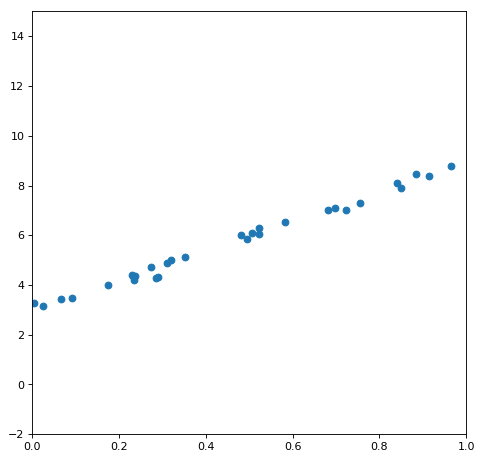

In [3]:
fig = plt.figure(dpi=80,figsize=(7,7))
ax = fig.add_subplot(111)
ax.set_xlim((0,1))
ax.set_ylim((-2,15))
plt.scatter(x_data,y_data)
line, = ax.plot([],[],lw=2)

In [ ]:
for i in range(250):
    animate(i)

In [4]:
resulting_animation = animation.FuncAnimation(fig,animate,np.arange(0,5),interval=100)

In [5]:
%matplotlib inline
resulting_animation

In [ ]:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)
resulting_animation.save('SGD_animation.mp4', writer=writer)

<h6>SGD w/momentum</h6>